# Xây dựng hệ thống User-User Collaborative Filtering kết nối Supabase

Notebook này hướng dẫn các bước kết nối đến Supabase để lấy dữ liệu đánh giá phim từ bảng `movie_rating` và thực hiện phân tích cơ bản chuẩn bị cho hệ thống gợi ý dựa trên User-User Collaborative Filtering.

## 1. Cài đặt và nhập các thư viện cần thiết
Cài đặt các thư viện `supabase`, `pandas` nếu chưa có, sau đó import vào notebook.

In [1]:
# Cài đặt thư viện nếu cần thiết (chạy một lần)
!pip install supabase pandas matplotlib

# Import các thư viện cần thiết
import pandas as pd
from supabase import create_client, Client

## 2. Kết nối đến Supabase
Thiết lập kết nối đến Supabase bằng SUPABASE_SERVICE_ROLE_KEY (có quyền cao nhất) và URL dự án. Bạn cần điền thông tin của mình vào biến môi trường `SUPABASE_URL` và `SUPABASE_SERVICE_ROLE_KEY`.

In [2]:
from dotenv import load_dotenv
import os

# Đọc biến môi trường từ file .env

load_dotenv()
SUPABASE_URL = os.getenv('SUPABASE_URL')
SUPABASE_SERVICE_ROLE_KEY = os.getenv('SUPABASE_SERVICE_ROLE_KEY')

supabase: Client = create_client(SUPABASE_URL, SUPABASE_SERVICE_ROLE_KEY)
print('Kết nối Supabase thành công với quyền service role!')

Kết nối Supabase thành công với quyền service role!


## 3. Truy vấn dữ liệu sở thích phim từ bảng favorites
Sử dụng Supabase client để lấy toàn bộ dữ liệu từ bảng `favorites`.

In [3]:
# Truy vấn toàn bộ dữ liệu sở thích phim từ bảng favorites
response = supabase.table('favorites').select('*').execute()
favorites_data = response.data
print(f'Số lượng bản ghi lấy được: {len(favorites_data)}')

Số lượng bản ghi lấy được: 25


## 4. Tiền xử lý dữ liệu đánh giá
Chuyển đổi dữ liệu sang DataFrame, kiểm tra và xử lý các giá trị thiếu hoặc bất thường.

In [4]:
# Chuyển dữ liệu sang DataFrame và kiểm tra dữ liệu
favorites_df = pd.DataFrame(favorites_data)
print('Các cột của DataFrame:', favorites_df.columns.tolist())
print('Số dòng:', len(favorites_df))

# Kiểm tra giá trị thiếu
print('Số lượng giá trị thiếu trên mỗi cột:')
print(favorites_df.isnull().sum())

# Hiển thị 5 dòng đầu
favorites_df.head()

Các cột của DataFrame: ['id', 'user_id', 'movie_id', 'movie_title', 'movie_poster_path', 'created_at']
Số dòng: 25
Số lượng giá trị thiếu trên mỗi cột:
id                   0
user_id              0
movie_id             0
movie_title          0
movie_poster_path    0
created_at           0
dtype: int64


,id,user_id,movie_id,movie_title,movie_poster_path,created_at
0,4,2670c0b1-fdf0-494f-99b6-1c90351cd9cb,1087192,How to Train Your Dragon,/41dfWUWtg1kUZcJYe6Zk6ewxzMu.jpg,2025-07-26T07:45:20.220912+00:00
1,5,2670c0b1-fdf0-494f-99b6-1c90351cd9cb,541671,Ballerina,/2VUmvqsHb6cEtdfscEA6fqqVzLg.jpg,2025-07-27T06:40:16.984922+00:00
2,6,b0e9ec7a-cc4d-4067-9a47-1df222843931,1087192,How to Train Your Dragon,/41dfWUWtg1kUZcJYe6Zk6ewxzMu.jpg,2025-07-27T16:43:35.891777+00:00
3,7,b0e9ec7a-cc4d-4067-9a47-1df222843931,1311031,Demon Slayer: Kimetsu no Yaiba Infinity Castle,/aFRDH3P7TX61FVGpaLhKr6QiOC1.jpg,2025-07-27T16:43:41.471106+00:00
4,8,b0e9ec7a-cc4d-4067-9a47-1df222843931,1061474,Superman,/ombsmhYUqR4qqOLOxAyr5V8hbyv.jpg,2025-07-27T16:43:49.687685+00:00


## 5. Phân tích thống kê cơ bản trên dữ liệu rating
Tính toán các thống kê như số lượng đánh giá, điểm trung bình, phân phối rating.

Tổng số lượt yêu thích: 25
Số lượng người dùng: 3
Số lượng phim: 20
Số phim trung bình mỗi người dùng đã yêu thích: 8.333333333333334
Số người dùng trung bình yêu thích mỗi phim: 1.25


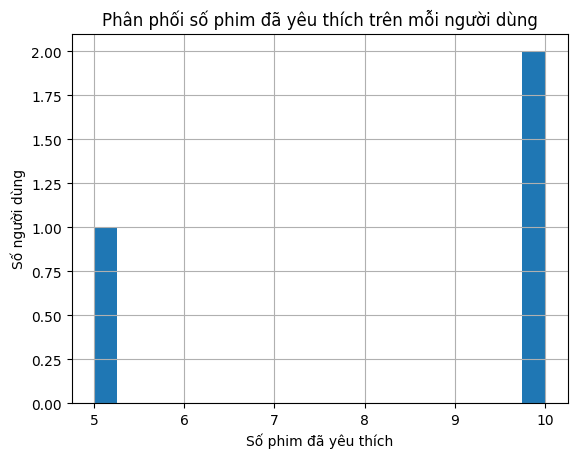

In [5]:
# Thống kê cơ bản trên dữ liệu favorites
print('Tổng số lượt yêu thích:', len(favorites_df))
print('Số lượng người dùng:', favorites_df['user_id'].nunique())
print('Số lượng phim:', favorites_df['movie_id'].nunique())

# Thống kê số phim mỗi người dùng đã yêu thích
user_fav_counts = favorites_df['user_id'].value_counts()
print('Số phim trung bình mỗi người dùng đã yêu thích:', user_fav_counts.mean())

# Thống kê số người dùng đã yêu thích mỗi phim
movie_fav_counts = favorites_df['movie_id'].value_counts()
print('Số người dùng trung bình yêu thích mỗi phim:', movie_fav_counts.mean())

# Vẽ biểu đồ phân phối số phim mỗi người dùng đã yêu thích
import matplotlib.pyplot as plt
user_fav_counts.hist(bins=20)
plt.xlabel('Số phim đã yêu thích')
plt.ylabel('Số người dùng')
plt.title('Phân phối số phim đã yêu thích trên mỗi người dùng')
plt.show()

## 6. To-do: Xây dựng hệ thống User-User Collaborative Filtering

Các bước triển khai hệ thống gợi ý dựa trên sở thích người dùng:

1. **Tạo ma trận user-item**
   - Mỗi dòng là một user, mỗi cột là một movie.
   - Giá trị là 1 nếu user đã yêu thích movie, 0 nếu chưa.

2. **Tính toán độ tương đồng giữa các user**
   - Sử dụng các phương pháp như Cosine similarity hoặc Jaccard similarity trên ma trận user-item.

3. **Tìm các user tương tự nhất với user mục tiêu**
   - Lấy top N user có độ tương đồng cao nhất.

4. **Gợi ý phim dựa trên sở thích của các user tương tự**
   - Lấy các phim mà user tương tự đã yêu thích nhưng user mục tiêu chưa xem.
   - Sắp xếp theo số lượng user tương tự đã yêu thích.

5. **Triển khai hàm gợi ý**
   - Xây dựng hàm nhận vào user_id và trả về danh sách phim gợi ý.

6. **Đánh giá kết quả gợi ý (nếu có ground truth)**
   - Sử dụng các chỉ số như Precision@K, Recall@K, v.v.

---

Bạn có thể thực hiện từng bước trên bằng các cell code tiếp theo. Nếu cần ví dụ code cho từng bước, hãy yêu cầu!

In [6]:
# Tạo ma trận user-item (user-movie)
# Mỗi dòng là một user, mỗi cột là một movie, giá trị là 1 nếu user đã yêu thích movie, 0 nếu chưa

user_item_matrix = favorites_df.pivot_table(index='user_id', columns='movie_id', values='id', aggfunc='count', fill_value=0)
user_item_matrix[user_item_matrix > 0] = 1  # Chuyển về nhị phân (1: đã yêu thích, 0: chưa)

print('Kích thước ma trận user-item:', user_item_matrix.shape)
user_item_matrix.head()

Kích thước ma trận user-item: (3, 20)


movie_id,7451,541671,552524,617126,749170,803796,911430,1011477,1058537,1061474,1071585,1087192,1119878,1124619,1136867,1234821,1263256,1268870,1311031,1315986
user_id,,,,,,,,,,,,,,,,,,,,
2670c0b1-fdf0-494f-99b6-1c90351cd9cb,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0
a26a74ac-c0b6-4a70-a661-45a824eca705,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
b0e9ec7a-cc4d-4067-9a47-1df222843931,0,0,1,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,1,1


In [7]:
# Tính toán độ tương đồng giữa các user bằng Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Ma trận user-item đã là nhị phân (0/1), có thể dùng trực tiếp
user_sim_matrix = cosine_similarity(user_item_matrix)

# Đưa về DataFrame để dễ thao tác, index và columns là user_id
user_sim_df = pd.DataFrame(user_sim_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

print('Kích thước ma trận tương đồng:', user_sim_df.shape)
user_sim_df.head()

Kích thước ma trận tương đồng: (3, 3)


user_id,2670c0b1-fdf0-494f-99b6-1c90351cd9cb,a26a74ac-c0b6-4a70-a661-45a824eca705,b0e9ec7a-cc4d-4067-9a47-1df222843931
user_id,,,
2670c0b1-fdf0-494f-99b6-1c90351cd9cb,1.0,0.0,0.5
a26a74ac-c0b6-4a70-a661-45a824eca705,0.0,1.0,0.0
b0e9ec7a-cc4d-4067-9a47-1df222843931,0.5,0.0,1.0


In [8]:
# Lấy top user có độ tương đồng cao nhất với một user bất kỳ
# Ví dụ: chọn user đầu tiên trong ma trận
user_id = user_sim_df.index[0]

# Lấy các user có độ tương đồng cao nhất (loại bỏ chính nó)
similar_users = user_sim_df.loc[user_id].drop(user_id).sort_values(ascending=False)

print(f'User tương tự nhất với {user_id}:')
print(similar_users.head(5))

User tương tự nhất với 2670c0b1-fdf0-494f-99b6-1c90351cd9cb:
user_id
b0e9ec7a-cc4d-4067-9a47-1df222843931    0.5
a26a74ac-c0b6-4a70-a661-45a824eca705    0.0
Name: 2670c0b1-fdf0-494f-99b6-1c90351cd9cb, dtype: float64


In [11]:
# Gợi ý phim cho user dựa trên sở thích của các user tương tự
# Chọn user_id cần gợi ý (ví dụ: user đầu tiên)
user_id = user_sim_df.index[0]

# Lấy top N user tương tự nhất
N = 5
similar_users = user_sim_df.loc[user_id].drop(user_id).sort_values(ascending=False).head(N).index.tolist()

# Lấy các phim mà các user tương tự đã yêu thích
movies_similar_users_like = user_item_matrix.loc[similar_users].sum(axis=0)

# Loại bỏ các phim mà user hiện tại đã yêu thích
movies_user_liked = set(user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] == 1].index)
recommend_movies = movies_similar_users_like.drop(labels=movies_user_liked)

# Sắp xếp phim theo số lượng user tương tự đã yêu thích (giảm dần)
recommend_movies = recommend_movies[recommend_movies > 0].sort_values(ascending=False)

print('Danh sách phim gợi ý cho user:', user_id)
print(recommend_movies.head(5))

Danh sách phim gợi ý cho user: 2670c0b1-fdf0-494f-99b6-1c90351cd9cb
movie_id
7451       1
749170     1
911430     1
1011477    1
1061474    1
dtype: int64


In [14]:
# Hàm gợi ý phim cho một user dựa trên các user tương tự nhất
def recommend_movies_for_user(user_id, user_item_matrix, user_sim_df, N=5, top_k=10):
    # Lấy top N user tương tự nhất
    similar_users = user_sim_df.loc[user_id].drop(user_id).sort_values(ascending=False).head(N).index.tolist()
    # Lấy các phim mà các user tương tự đã yêu thích
    movies_similar_users_like = user_item_matrix.loc[similar_users].sum(axis=0)
    # Loại bỏ các phim mà user hiện tại đã yêu thích
    movies_user_liked = set(user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] == 1].index)
    recommend_movies = movies_similar_users_like.drop(labels=movies_user_liked)
    # Sắp xếp phim theo số lượng user tương tự đã yêu thích (giảm dần)
    recommend_movies = recommend_movies[recommend_movies > 0].sort_values(ascending=False)
    return recommend_movies.head(top_k)

# Ví dụ sử dụng hàm gợi ý
user_id = user_sim_df.index[0]
print(f'Danh sách phim gợi ý cho user {user_id}:')
print(recommend_movies_for_user(user_id, user_item_matrix, user_sim_df, N=2, top_k=10))

Danh sách phim gợi ý cho user 2670c0b1-fdf0-494f-99b6-1c90351cd9cb:
movie_id
7451       1
749170     1
911430     1
1011477    1
1061474    1
1119878    1
1124619    1
1136867    1
1268870    1
1315986    1
dtype: int64
